In [19]:
# importing libraries

import numpy as np
import datetime
from matplotlib import pyplot as plt
from wotan import flatten
from betellib import tweet, build_string, get_mags_from_AAVSO
import pandas as pd

In [11]:
# function to make plot, from https://github.com/hippke/betelbot/blob/master/betel120d.py

def make_plot(days_ago, dates, mag):
    print('Making plot...')
    time_span = np.max(dates) - np.min(dates)
    min_plot = 0.0
    max_plot = 1.75
    x_days = 120
    
    # Make daily bins
    nights = np.arange(0, max(days_ago), 1)
    daily_mags = []
    errors = []
    for night in nights:
        selector = np.where((days_ago<night+1) & (days_ago>night))
        n_obs = np.size(mag[selector])
        flux = np.mean(mag[selector])
        error = np.std(mag[selector]) / np.sqrt(n_obs)
        if error > 0.75:
            error = 0
        daily_mags.append(flux)
        errors.append(error)
        print(night, flux, error, n_obs, np.std(mag[selector]))
    plt.errorbar(nights+0.5, daily_mags, yerr=errors, fmt='.k')
    plt.xlabel('Days before today')
    plt.ylabel('Visual magnitude')
    mid = np.median(mag)
    plt.ylim(min_plot, max_plot)
    plt.xlim(0, x_days)
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    date_text = datetime.datetime.now().strftime("%d %b %Y")
    plt.text(x_days-2, max_plot-0.05, 'AAVSO visual (by-eye) daily bins. Update: '+date_text)
    plt.savefig(plot_file, bbox_inches='tight', dpi=300)
    print('Plot made, test120')
    
    return nights, daily_mags, flux

https://www.aavso.org/apps/webobs/results/?star=betelgeuse&num_results=200&obs_types=vis&page=1
https://www.aavso.org/apps/webobs/results/?star=betelgeuse&num_results=200&obs_types=vis&page=2
https://www.aavso.org/apps/webobs/results/?star=betelgeuse&num_results=200&obs_types=vis&page=3
https://www.aavso.org/apps/webobs/results/?star=betelgeuse&num_results=200&obs_types=vis&page=4
https://www.aavso.org/apps/webobs/results/?star=betelgeuse&num_results=200&obs_types=vis&page=5
https://www.aavso.org/apps/webobs/results/?star=betelgeuse&num_results=200&obs_types=vis&page=6
https://www.aavso.org/apps/webobs/results/?star=betelgeuse&num_results=200&obs_types=vis&page=7
https://www.aavso.org/apps/webobs/results/?star=betelgeuse&num_results=200&obs_types=vis&page=8
https://www.aavso.org/apps/webobs/results/?star=betelgeuse&num_results=200&obs_types=vis&page=9
Building string...
My visual mag from last night was 1.60 (robust mean of 15 observations). That is 0.00 mag dimmer than the robust mean

274.0 0.37 0.0 1 0.0
275.0 nan nan 0 nan
276.0 0.7 0.21213203435596423 2 0.3
277.0 nan nan 0 nan
278.0 nan nan 0 nan
279.0 0.8 0.0 1 0.0
280.0 nan nan 0 nan
281.0 nan nan 0 nan
282.0 0.37 0.0 1 0.0
283.0 0.55 0.1060660171779821 2 0.14999999999999997
284.0 0.45 0.03535533905932737 2 0.04999999999999999
285.0 nan nan 0 nan
286.0 0.8 0.0 1 0.0
287.0 0.6 0.0 1 0.0
288.0 0.6 0.0 1 0.0
289.0 0.3 0.0 1 0.0
290.0 nan nan 0 nan
291.0 0.6 0.0 1 0.0
292.0 0.30000000000000004 0.07071067811865475 2 0.1
293.0 0.4 0.0 1 0.0
294.0 nan nan 0 nan
295.0 0.5 0.0 1 0.0
296.0 0.48749999999999993 0.10364452469860623 4 0.20728904939721246
297.0 0.5 0.0 1 0.0
298.0 nan nan 0 nan
299.0 nan nan 0 nan
300.0 nan nan 0 nan
301.0 0.5 0.0 1 0.0
302.0 0.5333333333333333 0.027216552697590865 3 0.04714045207910316
303.0 0.43333333333333335 0.07200822998230956 3 0.1247219128924647
304.0 0.47 0.07071067811865474 2 0.09999999999999998
305.0 0.6499999999999999 0.03535533905932737 2 0.04999999999999999
306.0 0.62333333333333

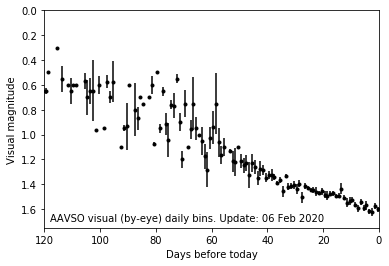

In [12]:
# Pull the last 10 pages from AAVSO and collate the dates and mags

plot_file = 'plot120d.png'
url_base = 'https://www.aavso.org/apps/webobs/results/?star=betelgeuse&num_results=200&obs_types=vis&page='
pages = np.arange(1, 10, 1)
all_dates = np.array([])
all_mags = np.array([])
for page in pages:
    url = url_base + str(page)
    print(url)
    dates, mags = get_mags_from_AAVSO(url)
    all_dates = np.concatenate((all_dates, dates))
    all_mags = np.concatenate((all_mags, mags))
dates = all_dates
mags = all_mags
days_ago = np.max(dates) - dates
text = build_string(days_ago, mags)
if text is not None:
    nights, daily_mags, flux = make_plot(days_ago, dates, mags)

In [21]:
# making a dictionary of the relevant data

values = daily_mags[0:120]
keys = nights[0:120]

data = {}

for i in range(len(keys)):
    tmp = {keys[i]:values[i]}
    data.update(tmp)

In [22]:
data

{0.0: 1.6014285714285716,
 1.0: 1.570952380952381,
 2.0: 1.6250000000000002,
 3.0: 1.61875,
 4.0: 1.5681818181818181,
 5.0: 1.5923529411764705,
 6.0: 1.5414285714285716,
 7.0: 1.5931818181818185,
 8.0: 1.5656,
 9.0: 1.5253846153846156,
 10.0: 1.5356521739130438,
 11.0: 1.5465217391304351,
 12.0: 1.5061538461538464,
 13.0: 1.435,
 14.0: 1.4915384615384613,
 15.0: 1.49375,
 16.0: 1.4713513513513516,
 17.0: 1.4751851851851852,
 18.0: 1.4917241379310346,
 19.0: 1.4854166666666666,
 20.0: 1.4542424242424241,
 21.0: 1.469189189189189,
 22.0: 1.4588235294117649,
 23.0: 1.445,
 24.0: 1.4480645161290322,
 25.0: 1.4265625,
 26.0: 1.4151999999999998,
 27.0: 1.5057894736842108,
 28.0: 1.3938095238095236,
 29.0: 1.4359090909090908,
 30.0: 1.4066666666666665,
 31.0: 1.4137500000000003,
 32.0: 1.4176666666666666,
 33.0: 1.333076923076923,
 34.0: 1.4557142857142855,
 35.0: 1.366969696969697,
 36.0: 1.392222222222222,
 37.0: 1.33775,
 38.0: 1.3277272727272724,
 39.0: 1.325,
 40.0: 1.3472222222222223,
 

In [47]:
# saving dictionary

import json

with open('Betelguese_120days.json', 'w') as fp:
    json.dump(data, fp)